<a href="https://colab.research.google.com/github/Kalidsa/TCC-2025-Kalidsa/blob/main/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!pip install transformers torch


In [ ]:
!pip install nlpaug
!pip install emoji
!pip install num2words

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 14.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4712a7657301a51ea6b8d734e553777effccfe8eb2d51cab403b26287ce35536
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt


In [ ]:
!pip uninstall -y torch
!pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 113.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 138.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.7 MB/s eta 0:00:00
     ━━

In [ ]:
!huggingface-cli login


⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/usr/lib/python3.12/getpass.py", line 77, in unix_getpass
    passwd = _raw_input(prompt, stream, input=input)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
import pandas as pd

df_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews.csv', sep=',')

app_names_unicos = df_original['app_name'].unique()

print(app_names_unicos)



['Shopee' 'SHEIN' 'Tiktok Lite' 'Nubank' 'Instagram' 'Photo&File Detect'
 'Whatsapp Messenger' 'Canva: Desenho, Fotos e Vídeos'
 'CapCut - Editor de Vídeos' 'gov.br']


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

df_original.columns = df_original.columns.str.strip().str.replace('\t', '')
df_original['sentiment'] = df_original['sentiment'].str.strip().str.lower()
df_original['sentiment_polarity'] = df_original['sentiment_polarity'].str.strip().str.lower()

px.histogram(df_original, x='sentiment', text_auto=True)

In [ ]:
px.histogram(df_original, x='sentiment_polarity', text_auto=True)

In [ ]:
px.histogram(df_original, x = 'sentiment', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji

df_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto



In [ ]:
df_original['content_traduzido'] = df_original['content'].astype(str)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(traduzir_emojis)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remover_acentos)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(preprocess)

print(df_original.head())

                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...           negative   

  sentiment Unnamed: 5                                  content_traduzido  
0   sadness        NaN  o app da shopee e razoavel apesar de ser facil...  
1   sadness        NaN  o app e bem otimizado facil de visualizar os p...  
2   sadn

In [ ]:
!pip install nlp
!python -m spacy download pt_core_news_sm
import spacy
nlp = spacy.load('pt_core_news_sm')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import psutil
import os
import time
import torch
import random
from transformers import BertForMaskedLM, BertTokenizer
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk
from transformers import GPT2LMHeadModel, GPT2Tokenizer


nltk.download('omw-1.4')
nltk.download('wordnet')
nlp = spacy.load("pt_core_news_sm")

process = psutil.Process(os.getpid())
start_time = time.time()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cuda':
      torch.backends.cudnn.benchmark = True

gpt2_model_name = "pierreguillou/gpt2-small-portuguese"
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)
special_tokens = [ "<|happiness|>", "<|sadness|>", "<|anger|>", "<|fear|>", "<|disgust|>", "<|surprise|>", "<|neutral|>" ]
gpt2_tokenizer.add_special_tokens({"additional_special_tokens": special_tokens})

gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_model.resize_token_embeddings(len(gpt2_tokenizer))
gpt2_model.eval()
gpt2_model.to(device)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50264, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50264, bias=False)
)

In [ ]:
def count_by_sentiment(df):
    return df.groupby('sentiment').size().reindex(target_sentiments, fill_value=0)

def apply_similarity_filter(df_aug, df_original, content, threshold=0.92):
    from sentence_transformers import util, SentenceTransformer
    from tqdm import tqdm

    if df_aug.empty:
        return df_aug

    model = SentenceTransformer('sentence-transformers/LaBSE')
    embeddings_aug = model.encode(df_aug[content].tolist(), convert_to_tensor=True)
    embeddings_original = model.encode(df_original[content].tolist(), convert_to_tensor=True)

    cos_sim_aug_to_original = util.cos_sim(embeddings_aug, embeddings_original)
    cos_sim_aug_to_aug = util.cos_sim(embeddings_aug, embeddings_aug)

    indices_to_keep = []

    for i in tqdm(range(len(embeddings_aug)), desc="Filtrando similares"):
        sim_to_original = cos_sim_aug_to_original[i].max().item()

        sim_scores = cos_sim_aug_to_aug[i]
        sim_scores[i] = -1
        sim_to_others = sim_scores.max().item() if len(sim_scores) > 1 else 0

        if sim_to_original >= threshold or sim_to_others >= threshold:
            continue
        indices_to_keep.append(i)


    filtered_df = df_aug.iloc[indices_to_keep].reset_index(drop=True)

    if 'sentiment' in df_aug.columns:
        print("\n🧹 Comentários removidos por similaridade (muito parecidos com originais ou entre si):")
        original_counts = df_aug['sentiment'].value_counts()
        filtered_counts = filtered_df['sentiment'].value_counts()
        for sentiment in original_counts.index:
            removed = original_counts[sentiment] - filtered_counts.get(sentiment, 0)
            print(f"🔸 {sentiment}: {removed} removidos")
    else:
        print("\n⚠️ Coluna 'sentiment' ausente. Não foi possível contar por sentimento.")

    return filtered_df

In [ ]:
def generate_text_gpt2(prompt, max_length=512, temperature=0.9, top_p=0.95, num_return_sequences=5):
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = gpt2_model.generate(
            input_ids,
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            num_return_sequences=num_return_sequences,
            pad_token_id=gpt2_tokenizer.eos_token_id
        )

    decoded_outputs = gpt2_tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return decoded_outputs

In [ ]:
df_original = df_original[['content_traduzido', 'sentiment', 'sentiment_polarity']].dropna()
df_original['content_traduzido'] = df_original['content_traduzido'].astype(str)

augmented_texts = []
original_texts = []
sentiments = []
polarities = []

target_sentiments = ['sadness', 'happiness', 'disgust', 'anger', 'fear', 'surprise', 'neutral']
MIN_COMMENTS = 952
device = "cuda" if torch.cuda.is_available() else "cpu"
threshold = 0.85


counts = count_by_sentiment(df_original)
print("Contagem inicial por sentimento:\n", counts)
print("🚀 Gerando dados aumentados com GPT-2...")
missing_sentiments = [s for s in target_sentiments if counts[s] < MIN_COMMENTS]
augmented_records = []
removed_count = {s: 0 for s in target_sentiments}

for sentiment in target_sentiments:
    needed = MIN_COMMENTS - counts[sentiment]
    subset = df_original[df_original['sentiment'] == sentiment]
    records = subset.to_dict('records')

    with tqdm(total=needed, desc=f"Aumentando: {sentiment}") as pbar:
        while sum(1 for r in augmented_records if r['sentiment'] == sentiment) < needed:
            orig = random.choice(records)
            decoded_outputs = generate_text_gpt2(orig['content_traduzido'])


            for full_gen in decoded_outputs:
                first_sent = full_gen.split('\n')[0].strip()
                if len(first_sent.split()) > 3:
                    augmented_records.append({
                    'content_traduzido': first_sent,
                    'sentiment': sentiment,
                    'sentiment_polarity': orig['sentiment_polarity']
                    })
                    pbar.update(1)
                    if sum(1 for r in augmented_records if r['sentiment'] == sentiment) >= needed:
                      break
            else:
                removed_count[sentiment] += 1



print("\n🗑 Comentários descartados por serem muito curtos (<=3 palavras):")
for sent, count in removed_count.items():
    print(f"🔹 {sent}: {count} comentários descartados")

df_aug = pd.DataFrame(augmented_records).drop_duplicates(subset='content_traduzido')

df_aug = df_aug[~df_aug['content_traduzido'].isin(df_original['content_traduzido'])]

df_aug_filtered = apply_similarity_filter(df_aug, df_original, 'content_traduzido')

df_filtered = pd.concat([df_original, df_aug_filtered], ignore_index=True)

df_original = pd.concat([df_original, df_aug_filtered], ignore_index=True)


counts = count_by_sentiment(df_original)
print("Contagem atual por sentimento:\n", counts)

df_filtered = pd.DataFrame({
    'content_traduzido': augmented_texts,
    'sentiment': sentiments,
    'sentiment_polarity': polarities
})

df_final = pd.concat([df_original, df_filtered], ignore_index=True)
df_final.to_csv('/content/drive/MyDrive/TCC/gpt-2_preprocess_dataset_augmentation.csv', index=False)

print("✅ Processo concluído com sucesso.")
end_time = time.time()
print(f"⏱ Tempo total: {end_time - start_time:.2f}s")
print(f"🧠 Memória usada: {process.memory_info().rss / 1024**2:.2f} MB")



Contagem inicial por sentimento:
 sentiment
sadness      864
happiness    319
disgust      952
anger        743
fear          47
surprise       4
neutral       82
dtype: int64
🚀 Gerando dados aumentados com GPT-2...


Aumentando: happiness: 100%|██████████| 633/633 [10:43<00:00,  1.02s/it]
Aumentando: disgust: 0it [00:00, ?it/s]
Aumentando: neutral: 100%|██████████| 870/870 [15:17<00:00,  1.05s/it]



🗑 Comentários descartados por serem muito curtos (<=3 palavras):
🔹 sadness: 17 comentários descartados
🔹 happiness: 126 comentários descartados
🔹 disgust: 0 comentários descartados
🔹 anger: 41 comentários descartados
🔹 fear: 180 comentários descartados
🔹 surprise: 189 comentários descartados
🔹 neutral: 174 comentários descartados


Filtrando similares: 100%|██████████| 3440/3440 [00:00<00:00, 10336.82it/s]



🧹 Comentários removidos por similaridade (muito parecidos com originais ou entre si):
🔸 surprise: 719 removidos
🔸 fear: 664 removidos
🔸 neutral: 334 removidos
🔸 happiness: 389 removidos
🔸 anger: 124 removidos
🔸 sadness: 54 removidos
Contagem atual por sentimento:
 sentiment
sadness      892
happiness    525
disgust      952
anger        818
fear         226
surprise     186
neutral      568
dtype: int64
✅ Processo concluído com sucesso.
⏱ Tempo total: 3690.64s
🧠 Memória usada: 3680.67 MB


In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews.csv', sep=',')

df_full = df_full[['content', 'sentiment', 'sentiment_polarity']].dropna()
df_full['content'] = df_full['content'].astype(str)

augmented_texts = []
original_texts = []
sentiments = []
polarities = []

target_sentiments = ['sadness', 'happiness', 'disgust', 'anger', 'fear', 'surprise', 'neutral']
MIN_COMMENTS = 952
device = "cuda" if torch.cuda.is_available() else "cpu"
threshold = 0.85


counts = count_by_sentiment(df_full)
print("Contagem inicial por sentimento:\n", counts)
print("🚀 Gerando dados aumentados com GPT-2...")
missing_sentiments = [s for s in target_sentiments if counts[s] < MIN_COMMENTS]
augmented_records = []
removed_count = {s: 0 for s in target_sentiments}

for sentiment in target_sentiments:
    needed = MIN_COMMENTS - counts[sentiment]
    subset = df_full[df_full['sentiment'] == sentiment]
    records = subset.to_dict('records')

    with tqdm(total=needed, desc=f"Aumentando: {sentiment}") as pbar:
        while sum(1 for r in augmented_records if r['sentiment'] == sentiment) < needed:
            orig = random.choice(records)
            decoded_outputs = generate_text_gpt2(orig['content'])


            for full_gen in decoded_outputs:
                first_sent = full_gen.split('\n')[0].strip()
                if len(first_sent.split()) > 3:
                    augmented_records.append({
                    'content': first_sent,
                    'sentiment': sentiment,
                    'sentiment_polarity': orig['sentiment_polarity']
                    })
                    pbar.update(1)
                    if sum(1 for r in augmented_records if r['sentiment'] == sentiment) >= needed:
                      break
            else:
                removed_count[sentiment] += 1



print("\n🗑 Comentários descartados por serem muito curtos (<=3 palavras):")
for sent, count in removed_count.items():
    print(f"🔹 {sent}: {count} comentários descartados")

df_aug = pd.DataFrame(augmented_records).drop_duplicates(subset='content')

df_aug = df_aug[~df_aug['content'].isin(df_full['content'])]

df_aug_filtered = apply_similarity_filter(df_aug, df_full,'content')

df_filtered = pd.concat([df_full, df_aug_filtered], ignore_index=True)

df_full = pd.concat([df_full, df_aug_filtered], ignore_index=True)


counts = count_by_sentiment(df_full)
print("Contagem atual por sentimento:\n", counts)

df_filtered = pd.DataFrame({
    'content': augmented_texts,
    'sentiment': sentiments,
    'sentiment_polarity': polarities
})

df_final = pd.concat([df_full, df_filtered], ignore_index=True)
df_final.to_csv('/content/drive/MyDrive/TCC/gpt-2_notpreprocess_dataset_augmentation.csv', index=False)

print("✅ Processo concluído com sucesso.")
end_time = time.time()
print(f"⏱ Tempo total: {end_time - start_time:.2f}s")
print(f"🧠 Memória usada: {process.memory_info().rss / 1024**2:.2f} MB")

Contagem inicial por sentimento:
 sentiment
sadness      864
happiness    319
disgust      952
anger        743
fear          47
surprise       4
neutral       82
dtype: int64
🚀 Gerando dados aumentados com GPT-2...


Aumentando: happiness: 100%|██████████| 633/633 [11:19<00:00,  1.07s/it]
Aumentando: disgust: 0it [00:00, ?it/s]
Aumentando: neutral: 100%|██████████| 870/870 [14:44<00:00,  1.02s/it]



🗑 Comentários descartados por serem muito curtos (<=3 palavras):
🔹 sadness: 17 comentários descartados
🔹 happiness: 126 comentários descartados
🔹 disgust: 0 comentários descartados
🔹 anger: 41 comentários descartados
🔹 fear: 180 comentários descartados
🔹 surprise: 189 comentários descartados
🔹 neutral: 173 comentários descartados


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Filtrando similares: 100%|██████████| 2050/2050 [00:00<00:00, 10977.72it/s]



🧹 Comentários removidos por similaridade (muito parecidos com originais ou entre si):
🔸 neutral: 271 removidos
🔸 fear: 408 removidos
🔸 happiness: 246 removidos
🔸 surprise: 226 removidos
🔸 anger: 89 removidos
🔸 sadness: 27 removidos
Contagem atual por sentimento:
 sentiment
sadness      874
happiness    462
disgust      952
anger        811
fear         175
surprise      36
neutral      484
dtype: int64
✅ Processo concluído com sucesso.
⏱ Tempo total: 3769.99s
🧠 Memória usada: 3059.43 MB


In [ ]:
import re
from collections import Counter

def clean_sentences_improved(text, max_repeats=3):
    text = str(text).split('\n')[0].strip()

    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    text = re.sub(r'(\b\w+\b)(?:[-\s]+(?=\1\b))+', r'\1', text)

    text = re.sub(r'\s+', ' ', text)

    words = text.split()
    word_counts = Counter()
    filtered = []

    for word in words:
        word_counts[word] += 1
        if word_counts[word] <= max_repeats:
            filtered.append(word)

    return ' '.join(filtered)





Necessário realizar uma limpeza no dataset, pois foi gerados comentários repetidos após quebra de linha e comentários com palavras repetidas de forma exagerada, como por exemplo:

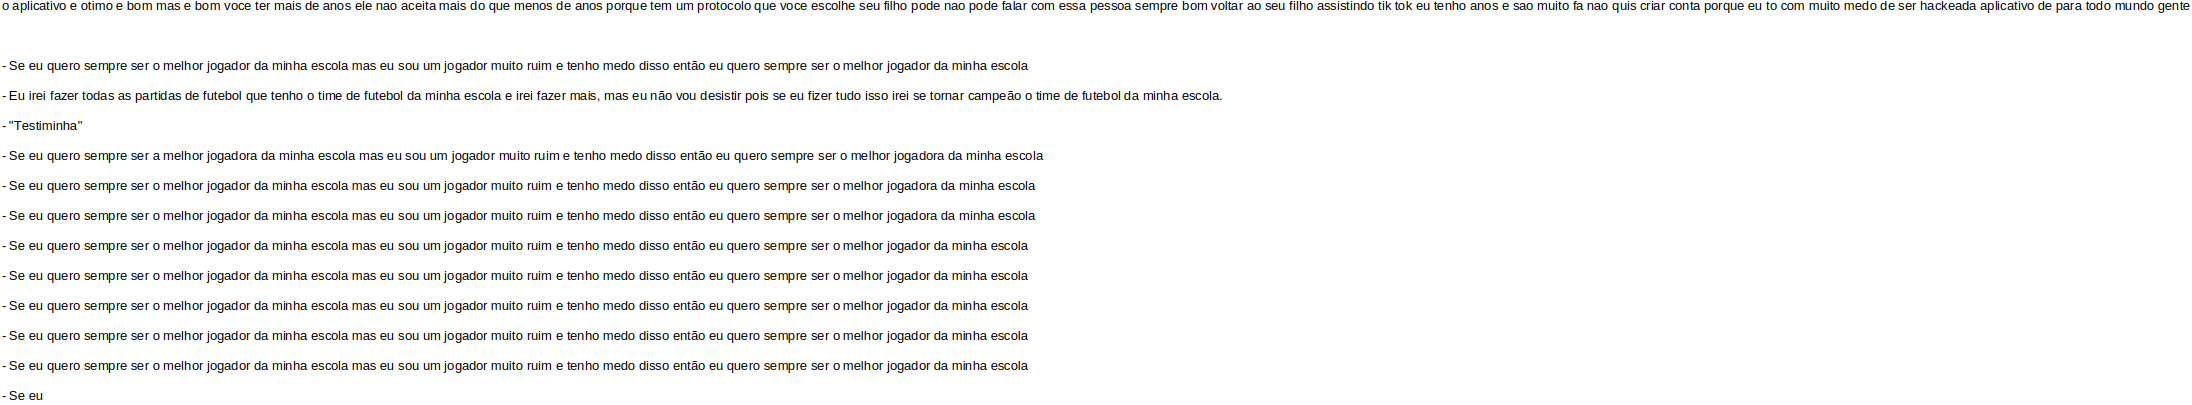

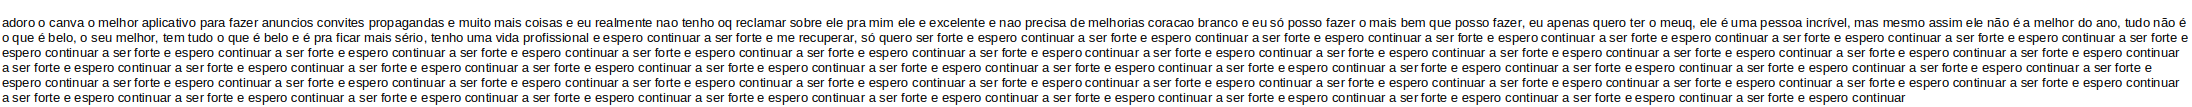

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC/gpt-2_preprocess_dataset_augmentation.csv', sep=',')

df['content_traduzido'] = df['content_traduzido'].apply(clean_sentences_improved)


df.to_csv('/content/drive/MyDrive/TCC/dataset_preprocess_limpo.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


data_content_balanceado = pd.read_csv('/content/drive/MyDrive/TCC/dataset_preprocess_limpo.csv')
data_content_balanceado.columns = data_content_balanceado.columns.str.strip().str.replace('\t', '')
data_content_balanceado['sentiment'] = data_content_balanceado['sentiment'].str.strip().str.lower()
data_content_balanceado['sentiment_polarity'] = data_content_balanceado['sentiment_polarity'].str.strip().str.lower()

px.histogram(data_content_balanceado, x='sentiment', text_auto=True)

In [ ]:
px.histogram(data_content_balanceado, x='sentiment_polarity', text_auto=True)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/TCC/gpt-2_notpreprocess_dataset_augmentation.csv', sep=',')

df2['content'] = df2['content'].apply(clean_sentences_improved)


df2.to_csv('/content/drive/MyDrive/TCC/dataset_notpreprocess_limpo.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


data_content_balanceado2 = pd.read_csv('/content/drive/MyDrive/TCC/dataset_notpreprocess_limpo.csv')
data_content_balanceado2.columns = data_content_balanceado2.columns.str.strip().str.replace('\t', '')
data_content_balanceado2['sentiment'] = data_content_balanceado2['sentiment'].str.strip().str.lower()
data_content_balanceado2['sentiment_polarity'] = data_content_balanceado2['sentiment_polarity'].str.strip().str.lower()

px.histogram(data_content_balanceado2, x='sentiment', text_auto=True)

In [ ]:
px.histogram(data_content_balanceado2, x='sentiment_polarity', text_auto=True)

In [ ]:
!pip install datasets

# Bertimbau Dataset Original

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)



def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = remove_stopwords(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto

df_original['content_traduzido'] = df_original['content'].astype(str)
df_original = df_original.dropna(subset=['content_traduzido'])
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remove_stopwords)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(traduzir_emojis)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(remover_acentos)
df_original['content_traduzido'] = df_original['content_traduzido'].apply(preprocess)

print(df_original.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                               reviewId app_name  \
0  01e23c15-44bf-46b7-b280-40e880d9d49b   Shopee   
1  df40ba7c-075d-48dc-b798-21466dfb41d6   Shopee   
2  59490b23-b17b-4bba-855b-b5053dadc0db   Shopee   
3  48fd8168-1e42-4475-9a99-935c2fd48769   Shopee   
4  f4e1468b-6d97-4f1a-927d-1afee2bfbe75   Shopee   

                                             content sentiment_polarity  \
0  O app da Shopee é razoável. Apesar de ser fáci...           positive   
1  O app é bem otimizado, fácil de visualizar os ...           positive   
2  O app é muito bom, prático e fácil de entender...           positive   
3  Aplicativo muito bom. Mas algo que me chateou ...           positive   
4  o app é muito bom, porém tenho tido dificuldad...           negative   

  sentiment Unnamed: 5                                  content_traduzido  
0   sadness        NaN  o app shopee razoavel apesar facil utilizar ap...  
1   sadness        NaN  o app bem otimizado facil visualizar produtos ...  
2   sadn

In [ ]:
import nlp
nlp = spacy.load('pt_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'ADJ', 'VERB', 'ADV'}]

    """Criação da lista de substantivos"""

train_lemmatizer_original = df_original.copy()
train_lemmatizer_original['spacy_lemma'] = df_original['content_traduzido'].apply(lemmatize_text)
train_lemmatizer_original.to_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv', index=False)

In [ ]:
#bibliotecas
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'
lemma = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv')

tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment = LabelEncoder()

lemma['sentiment'] = label_encoder_sentiment.fit_transform(lemma['sentiment'])


train_df, test_df = train_test_split(lemma, test_size=0.2, random_state=42, stratify=lemma['sentiment'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_sentiment = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')


training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/TCC/results_sentiment_app_reviews',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_sentiment.train()


evaluation_metrics_sentiment = trainer_sentiment.evaluate()

predictions_output = trainer_sentiment.predict(test_dataset)


logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


sentiment_real = label_encoder_sentiment.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment.inverse_transform(predicted_labels)


texts = test_df['content'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma:': text_spacy,
    'sentiment': sentiment_real,
    'sentiment_predicted': sentiment_pred
})


df_results.to_csv('/content/drive/MyDrive/TCC/resultados dataset original/bertimbau_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_sentiment_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/TCC/resultados dataset original/metricas_bert_results.csv', index=False)
print(df)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,1.164559,0.619,0.534,0.525,0.534
2,No log,0.879766,0.699,0.685,0.669,0.685
3,1.070500,0.898867,0.690,0.675,0.658,0.675


✅ Arquivo 'bertimbau_sentiment_predict.csv' salvo com sucesso.
      Metric BERTimbau
0  Precision     0.690
1     Recall     0.675
2   F1-Score     0.658
3   Accuracy     0.675



Tempo total: 63.01 segundos
Uso de CPU: 0.0%
Memória usada: 4009.06 MB


In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'
data_content3 = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv')

tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment_polarity = LabelEncoder()
data_content3['sentiment_polarity'] = label_encoder_sentiment_polarity.fit_transform(data_content3[['sentiment_polarity']])
data_content3['sentiment_polarity'] = data_content3['sentiment_polarity'].astype(int)


train_df_polarity, test_df_polarity = train_test_split(data_content3, test_size=0.2, random_state=42, stratify=data_content3['sentiment_polarity'])


train_dataset_polarity = Dataset.from_pandas(train_df_polarity)
test_dataset_polarity = Dataset.from_pandas(test_df_polarity)


model_polarity = AutoModelForSequenceClassification.from_pretrained(path_bert,num_labels=len(label_encoder_sentiment_polarity.classes_)) # Assumindo 3 classes para polaridade

train_dataset_polarity = train_dataset_polarity.map(preprocess_function, batched=True)
test_dataset_polarity = test_dataset_polarity.map(preprocess_function, batched=True)

train_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])
test_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])

train_dataset_polarity = train_dataset_polarity.rename_column('sentiment_polarity', 'labels')
test_dataset_polarity = test_dataset_polarity.rename_column('sentiment_polarity', 'labels')


training_args_polarity = TrainingArguments(
    output_dir='/content/drive/MyDrive/TCC/results_polarity',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_polarity = Trainer(
    model=model_polarity,
    args=training_args_polarity,
    train_dataset=train_dataset_polarity,
    eval_dataset=test_dataset_polarity,
    compute_metrics=compute_metrics
)

trainer_polarity.train()


evaluation_metrics_polarity = trainer_polarity.evaluate()


predictions_output = trainer_polarity.predict(test_dataset_polarity)

logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)


true_labels = test_dataset_polarity['labels']


sentiment_real = label_encoder_sentiment_polarity.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment_polarity.inverse_transform(predicted_labels)

texts = test_df['content'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment_polarity': sentiment_real,
    'sentiment_polarity_predict': sentiment_pred
})


df_results.to_csv('/content/drive/MyDrive/TCC/resultados dataset original/bertimbau_polarity_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_polarity_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_polarity['eval_Precision'],
        evaluation_metrics_polarity['eval_Recall'],
        evaluation_metrics_polarity['eval_F1-Score'],
        evaluation_metrics_polarity['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/TCC/resultados dataset original/metricas_bert_results_polarity.csv', index=False)
print(df)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.737416,0.810,0.728,0.717,0.728
2,No log,0.519414,0.826,0.833,0.825,0.833
3,0.474700,0.540324,0.817,0.824,0.818,0.824


✅ Arquivo 'bertimbau_polarity_predict.csv' salvo com sucesso.
      Metric BERTimbau
0  Precision     0.817
1     Recall     0.824
2   F1-Score     0.818
3   Accuracy     0.824



Tempo total: 59.54 segundos
Uso de CPU: 0.0%
Memória usada: 4301.64 MB


# BERTIMBAU dataset aumentado

In [ ]:
import pandas as pd
import regex
import unicodedata
from num2words import num2words
import emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_aumentado = pd.read_csv('/content/drive/MyDrive/TCC/dataset_preprocess_limpo.csv', sep=',')


def traduzir_emojis(texto):
    return emoji.demojize(texto, language='pt')

def remover_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def numero_para_palavra(texto):
    def substituir_numeros(palavra):
        numeros_encontrados = regex.findall(r'\d+', palavra)
        for numero in numeros_encontrados:
            try:
                extenso = num2words(int(numero), lang='pt')
                palavra = palavra.replace(numero, extenso)
            except:
                pass
        return palavra


    palavras_processadas = [substituir_numeros(p) for p in texto.split()]
    return ' '.join(palavras_processadas)

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)



def preprocess(texto):
    texto = traduzir_emojis(texto)
    texto = remover_acentos(texto)
    texto = remove_stopwords(texto)
    texto = texto.replace(":", " ")
    texto = texto.replace("_", " ")
    texto = regex.sub(r'[^\p{Latin} :_]', ' ', texto)
    texto = regex.sub(r'(.)\1{2,}', r'\1', texto)
    texto = texto.lower()
    texto = regex.sub(r'\s+', ' ', texto).strip()
    texto = numero_para_palavra(texto)
    return texto

df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].astype(str)
df_aumentado = df_aumentado.dropna(subset=['content_traduzido'])
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(remove_stopwords)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(traduzir_emojis)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(remover_acentos)
df_aumentado['content_traduzido'] = df_aumentado['content_traduzido'].apply(preprocess)

print(df_aumentado.count())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


content_traduzido     4167
sentiment             4167
sentiment_polarity    4167
dtype: int64


In [ ]:
import nlp
import spacy
nlp = spacy.load('pt_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)

    return [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'ADJ', 'VERB', 'ADV'}]

    """Criação da lista de substantivos"""

train_lemmatizer = df_aumentado.copy()
train_lemmatizer['spacy_lemma'] = df_aumentado['content_traduzido'].apply(lemmatize_text)
train_lemmatizer.to_csv('/content/drive/MyDrive/TCC/gpt_2_preprocess_lemmatizer.csv', index=False)

In [ ]:
!pip install datasets

In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'


tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_sentiment = LabelEncoder()

train_lemmatizer['sentiment'] = label_encoder_sentiment.fit_transform(train_lemmatizer['sentiment'])


train_df, test_df = train_test_split(train_lemmatizer, test_size=0.2, random_state=42, stratify=train_lemmatizer['sentiment'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_sentiment = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')

training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/TCC/results_sentiment_aumentado_preprocess',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_sentiment.train()


evaluation_metrics_sentiment = trainer_sentiment.evaluate()


predictions_output = trainer_sentiment.predict(test_dataset)


logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


sentiment_real = label_encoder_sentiment.inverse_transform(true_labels)
sentiment_pred = label_encoder_sentiment.inverse_transform(predicted_labels)


texts = test_df['spacy_lemma'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)

df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment': sentiment_real,
    'sentiment_predict': sentiment_pred
})

df_results.to_csv('//content/drive/MyDrive/TCC/resultados com data augmentation preprocess/bertimbau_aumentado_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_aumentado_sentiment_predict.csv' salvo com sucesso.")


df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/TCC/resultados com data augmentation preprocess/bert_aumentado_results_metricas.csv', index=False)
df

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3333 [00:00<?, ? examples/s]

Map:   0%|          | 0/834 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning:

invalid escape sequence '\/'



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kalidsabuzzattioli (kalidsabuzzattioli-ufsm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.956465,0.657,0.631,0.622,0.631
2,1.212200,0.737312,0.727,0.728,0.724,0.728
3,0.612700,0.699689,0.742,0.739,0.738,0.739


✅ Arquivo 'bertimbau_aumentado_sentiment_predict.csv' salvo com sucesso.



Tempo total: 276.18 segundos
Uso de CPU: 0.0%
Memória usada: 2799.74 MB


In [ ]:
# Dataset completo
full_dataset = Dataset.from_pandas(train_lemmatizer.copy())

# Pré-processar tudo
full_dataset = full_dataset.map(preprocess_function, batched=True)
full_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Gerar predições em TODO o dataset
predictions_full = trainer_sentiment.predict(full_dataset)

# Extrair as classes preditas
logits_full = predictions_full.predictions
predicted_labels_full = np.argmax(logits_full, axis=-1)
sentiment_pred_full = label_encoder_sentiment.inverse_transform(predicted_labels_full)

# Montar DataFrame com o dataset inteiro
df_results_full = pd.DataFrame({
    'content': train_lemmatizer['content_traduzido'],
    'spacy_lemma': train_lemmatizer['spacy_lemma'],
    'sentiment':train_lemmatizer['sentiment'],
    'sentiment_predict': sentiment_pred_full
})

# Salvar com todos os 4000+
df_results_full.to_csv('/content/drive/MyDrive/TCC/resultados_completos_bertimbau/bertimbau_full_sentiment_predict.csv', index=False)
print("✅ Arquivo com todas as predições salvo!")


Map:   0%|          | 0/4167 [00:00<?, ? examples/s]

✅ Arquivo com todas as predições salvo!


In [ ]:
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import pandas as pd

def preprocess_function(examples):
    examples['spacy_lemma'] = [str(text) for text in examples['spacy_lemma']]
    return tokenizer_sentiment(examples['spacy_lemma'], truncation=True, padding='max_length', max_length=128)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


path_bert = 'neuralmind/bert-base-portuguese-cased'


tokenizer_sentiment = AutoTokenizer.from_pretrained(path_bert)


label_encoder_polarity = LabelEncoder()

train_lemmatizer['sentiment_polarity'] = label_encoder_polarity.fit_transform(train_lemmatizer['sentiment_polarity'])


train_df, test_df = train_test_split(train_lemmatizer, test_size=0.2, random_state=42, stratify=train_lemmatizer['sentiment_polarity'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

model_polarity = AutoModelForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_polarity.classes_))


train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'], output_all_columns=True)


train_dataset = train_dataset.rename_column('sentiment_polarity', 'labels')
test_dataset = test_dataset.rename_column('sentiment_polarity', 'labels')

training_args = TrainingArguments(
    report_to = 'wandb',
    output_dir='/content/drive/MyDrive/TCC/resultados com data augmentation preprocess/results_sentiment_aumentado',
    eval_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=10,
    per_device_eval_batch_size=10,
    num_train_epochs=3,
    weight_decay=0.01,
)


trainer_polarity = Trainer(
    model=model_polarity,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


trainer_polarity.train()


evaluation_metrics_polarity = trainer_polarity.evaluate()


predictions_output = trainer_polarity.predict(test_dataset)

logits = predictions_output.predictions
predicted_labels = np.argmax(logits, axis=-1)

true_labels = test_dataset['labels']


polarity_real = label_encoder_polarity.inverse_transform(true_labels)
polarity_pred = label_encoder_polarity.inverse_transform(predicted_labels)


texts = test_df['spacy_lemma'].reset_index(drop=True)
text_spacy = test_df['spacy_lemma'].reset_index(drop=True)


df_results = pd.DataFrame({
    'content': texts,
    'spacy_lemma': text_spacy,
    'sentiment_polarity': polarity_real,
    'sentiment_polarity_predict': polarity_pred
})


df_results.to_csv('/content/drive/MyDrive/TCC/resultados com data augmentation preprocess/bertimbau_aumentado_polarity_sentiment_predict.csv', index=False)

print("✅ Arquivo 'bertimbau_aumentado_sentiment_polarity_predict.csv' salvo com sucesso.")



df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'BERTimbau': [
        evaluation_metrics_sentiment['eval_Precision'],
        evaluation_metrics_sentiment['eval_Recall'],
        evaluation_metrics_sentiment['eval_F1-Score'],
        evaluation_metrics_sentiment['eval_Accuracy']
    ]
})

df.to_csv('/content/drive/MyDrive/TCC/resultados com data augmentation preprocess/bert_aumentado_polarity_results_metricas.csv', index=False)
df

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/3333 [00:00<?, ? examples/s]

Map:   0%|          | 0/834 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Precision,Recall,F1-score,Accuracy
1,No log,0.393142,0.860,0.847,0.846,0.847
2,0.488500,0.302446,0.901,0.900,0.900,0.900
3,0.221900,0.384112,0.902,0.899,0.900,0.899


✅ Arquivo 'bertimbau_aumentado_sentiment_polarity_predict.csv' salvo com sucesso.



Tempo total: 111.90 segundos
Uso de CPU: 0.0%
Memória usada: 4282.76 MB


In [ ]:
# Dataset completo
full_dataset = Dataset.from_pandas(train_lemmatizer.copy())

# Pré-processar tudo
full_dataset = full_dataset.map(preprocess_function, batched=True)
full_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Gerar predições em TODO o dataset
predictions_full = trainer_sentiment.predict(full_dataset)

# Extrair as classes preditas
logits_full = predictions_full.predictions
predicted_labels_full = np.argmax(logits_full, axis=-1)
polarity_pred_full = label_encoder_polarity.inverse_transform(predicted_labels_full)

# Montar DataFrame com o dataset inteiro
df_results_full = pd.DataFrame({
    'content': train_lemmatizer['content_traduzido'],
    'spacy_lemma': train_lemmatizer['spacy_lemma'],
    'sentiment_polarity':train_lemmatizer['sentiment_polarity'],
    'sentiment_polarity_predict': polarity_pred_full
})

# Salvar com todos os 4000+
df_results_full.to_csv('/content/drive/MyDrive/TCC/resultados_completos_bertimbau/bertimbau_full_polarity_predict.csv', index=False)
print("✅ Arquivo com todas as predições salvo!")


NameError: name 'Dataset' is not defined

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

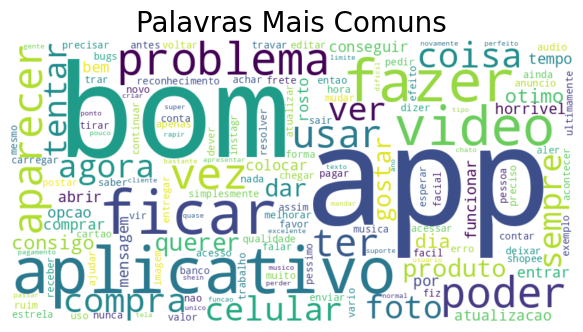

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

df = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv', sep=',')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['cleaned_content'] = df['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df['cleaned_content'].tolist())

word_counts = Counter(all_words.split())


top_common_words = dict(word_counts.most_common(150))
least_common_words = dict(word_counts.most_common()[-150:])


wordcloud_common = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_common_words)


wordcloud_rare = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(least_common_words)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.title('Palavras Mais Comuns', fontsize=20)
plt.axis('off')

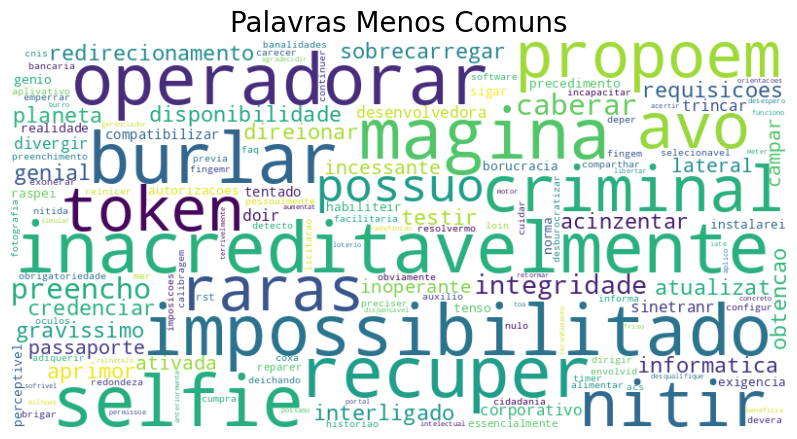

{'inacreditavelmente': 1, 'impossibilitado': 1, 'operadorar': 1, 'magina': 1, 'burlar': 1, 'recuper': 1, 'selfie': 1, 'criminal': 1, 'nitir': 1, 'propoem': 1, 'avo': 1, 'token': 1, 'raras': 1, 'possuo': 1, 'preencho': 1, 'caberar': 1, 'integridade': 1, 'sobrecarregar': 1, 'requisicoes': 1, 'atualizat': 1, 'interligado': 1, 'redirecionamento': 1, 'gravissimo': 1, 'disponibilidade': 1, 'aprimor': 1, 'acinzentar': 1, 'testir': 1, 'informatica': 1, 'planeta': 1, 'genial': 1, 'direionar': 1, 'credenciar': 1, 'obtencao': 1, 'passaporte': 1, 'incessante': 1, 'lateral': 1, 'ativada': 1, 'campar': 1, 'inoperante': 1, 'corporativo': 1, 'trincar': 1, 'doir': 1, 'desenvolvedora': 1, 'divergir': 1, 'sinetranr': 1, 'compatibilizar': 1, 'tentado': 1, 'precedimento': 1, 'autorizacoes': 1, 'borucracia': 1, 'instalarei': 1, 'sigar': 1, 'exigencia': 1, 'norma': 1, 'genio': 1, 'habiliteir': 1, 'raspei': 1, 'perceptivel': 1, 'realidade': 1, 'tenso': 1, 'essencialmente': 1, 'rst': 1, 'reparer': 1, 'obrigato

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_rare, interpolation='bilinear')
plt.title('Palavras Menos Comuns', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

print(least_common_words)

Batches:   0%|          | 0/95 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Coefficient (UMAP): 0.12
Proporção de outliers: 0.13%
Total de comentários fora de cluster: 4
Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): 0


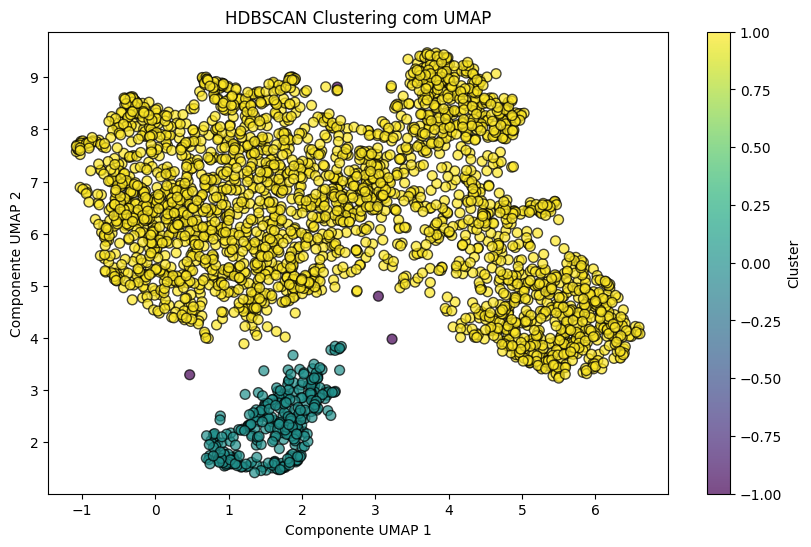

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import hdbscan
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer

# === 1. Carrega e pré-processa ===
df_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv', sep=',')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df_original['cleaned_content'] = df_original['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df_original['cleaned_content'].tolist())
word_counts = Counter(all_words.split())

# Lista com as 150 palavras mais comuns
top_common_words = set([word for word, _ in word_counts.most_common(150)])

# === 2. Embeddings + Clustering ===
model = SentenceTransformer('LaBSE')
comentarios_original = df_original['spacy_lemma'].astype(str).tolist()
embeddings = model.encode(comentarios_original, show_progress_bar=True)

umap_model = umap.UMAP(
    n_neighbors=10,
    n_components=2,
    metric='cosine',
    random_state=42
)
umap_embeddings_comentarios = umap_model.fit_transform(embeddings)

clusterer = hdbscan.HDBSCAN(min_cluster_size=15,
                            min_samples=10,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)
cluster_fit = clusterer.fit(umap_embeddings_comentarios)

labels = clusterer.labels_
# Avalia coerência (somente se >1 cluster)
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(umap_embeddings_comentarios, labels)
    print("Silhouette Coefficient (UMAP): {:.2f}".format(silhouette_avg))
else:
    print("Silhouette não calculado (somente 1 cluster encontrado).")

df_original['cluster'] = labels
df_original['umap_x'] = umap_embeddings_comentarios[:, 0]
df_original['umap_y'] = umap_embeddings_comentarios[:, 1]

# === 3. Filtra os comentários "fora de cluster" com poucas palavras comuns ===
def count_common_words(text):
    return sum(1 for word in text.split() if word in top_common_words)

# Comentários fora de cluster
outliers_df_original = df_original[df_original['cluster'] == -1].copy()
outliers_df_original['common_word_count'] = outliers_df_original['cleaned_content'].apply(count_common_words)
outlier_ratio = np.mean(labels == -1)
print(f"Proporção de outliers: {outlier_ratio:.2%}")
# Exclui comentários que possuem menos de 2 palavras comuns (ajustável)
fora_de_contexto = outliers_df_original[outliers_df_original['common_word_count'] < 2]

print(f"Total de comentários fora de cluster: {len(outliers_df_original)}")
print(f"Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): {len(fora_de_contexto)}")

# === 4. Visualização (opcional) ===
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df_original['umap_x'],
    y=df_original['umap_y'],
    c=df_original['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k'
)
plt.colorbar(label='Cluster')
plt.title('HDBSCAN Clustering com UMAP')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.show()

# === 5. Exporta se desejar ===
fora_de_contexto.to_csv('apps_comentarios_fora_de_contexto_filtrados.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Calcula centróides por cluster
centroids = {}
for cluster_id in df_original['cluster'].unique():
    if cluster_id == -1:
        continue
    cluster_points = df_original[df_original['cluster'] == cluster_id][['umap_x', 'umap_y']].values
    centroid = np.mean(cluster_points, axis=0)
    centroids[cluster_id] = centroid

# Calcula distância ao centróide
distances = []
for index, row in df_original.iterrows():
    cluster_id = row['cluster']
    point = row[['umap_x', 'umap_y']].values
    if cluster_id == -1:
        distances.append(np.nan)
    else:
        centroid = centroids[cluster_id]
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)

df_original['distance_to_centroid'] = distances
df_original['original_index'] = df_original.index  # salva o índice original

# Comentários fora de contexto (fora de cluster)
outliers_df = df_original[df_original['distance_to_centroid'].isna()]
outliers_df.to_csv('/content/drive/MyDrive/TCC/apps_comentarios_fora_de_contexto.csv', index=False)

# Apenas para visualização
print('\n\n')
num_outliers_validos = df_original['distance_to_centroid'].notna().sum()
print(f"Quantidade de comentários com distância válida ao centróide: {num_outliers_validos}")
outliers_count = df_original['distance_to_centroid'].isna().sum()
print(f"Quantidade de comentários fora do contexto: {outliers_count}")





Quantidade de comentários com distância válida ao centróide: 3007
Quantidade de comentários fora do contexto: 4


In [ ]:
import pandas as pd

outliers_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_comentarios_fora_de_contexto.csv', sep=',')

index_column = 'original_index' if 'original_index' in outliers_original.columns else outliers_original.index

sentiment_counts = outliers_original['sentiment'].value_counts()

above_3012 = outliers_original[outliers_original[index_column] > 3012]
below_or_equal_3012 = outliers_original[outliers_original[index_column] <= 3012]


count_above_3012 = above_3012.shape[0]
count_below_or_equal_3012 = below_or_equal_3012.shape[0]

comments_above_3012 = above_3012[['sentiment', 'comment']] if 'comment' in above_3012.columns else above_3012

comments_below_or_equal_3012 = below_or_equal_3012[['sentiment', 'comment']] if 'comment' in below_or_equal_3012.columns else below_or_equal_3012


print("Contagem por sentimento:\n", sentiment_counts)
print("\nQuantidade de comentários com índice > 3012:", count_above_3012)
print("Quantidade de comentários com índice <= 3012:", count_below_or_equal_3012)

print("\nComentários com índice > 3012:")
print(comments_above_3012)

print("\nComentários com índice <= 3012:")
print(comments_below_or_equal_3012)


Contagem por sentimento:
 sentiment
disgust      2
sadness      1
happiness    1
Name: count, dtype: int64

Quantidade de comentários com índice > 3012: 0
Quantidade de comentários com índice <= 3012: 4

Comentários com índice > 3012:
Empty DataFrame
Columns: [reviewId, app_name, content, sentiment_polarity, sentiment, Unnamed: 5, content_traduzido, spacy_lemma, cleaned_content, cluster, umap_x, umap_y, distance_to_centroid, original_index]
Index: []

Comentários com índice <= 3012:
                               reviewId           app_name  \
0  54c0ca14-ebcf-42ef-8fbb-d521b446bded              SHEIN   
1  a2df465e-4d46-4c54-91b2-46f6bf59213c          Instagram   
2  1a1e2485-a5bf-4b44-bd43-dcf91431b772  Photo&File Detect   
3  7544d28a-2bee-4105-add3-55415e7fb482             gov.br   

                                             content sentiment_polarity  \
0  por enquanto, uma boa experiência no geral, ma...           positive   
1  O número de seguidores está bugado, nao mostra..

In [ ]:
from collections import Counter

for cluster_id in sorted(df_original['cluster'].unique()):
    if cluster_id == -1:
        continue  # ignora outliers
    print(f"\n=== Cluster {cluster_id} ===")

    # 1️⃣ 10 comentários de exemplo
    exemplos = df_original[df_original['cluster'] == cluster_id]['spacy_lemma'].head(10).tolist()
    for ex in exemplos:
        print("-", ex)

    # 2️⃣ Palavras mais comuns
    palavras = ' '.join(df_original[df_original['cluster'] == cluster_id]['cleaned_content']).split()
    mais_comuns = Counter(palavras).most_common(10)
    print("\nPalavras mais frequentes:", mais_comuns)



=== Cluster 0 ===
- ['problema', 'resolver', 'nota']
- ['infelizmente', 'tiver', 'vir', 'aqui', 'conseguir', 'relatar', 'desapontamento', 'conseguir', 'relatar', 'procurar', 'opcao', 'impulsionar', 'tok', 'litar', 'mesmo', 'encontrei', 'entao', 'entrar', 'opcao', 'relatar', 'problema', 'pontinho', 'aler', 'encontrar', 'resposta', 'opcao', 'busco', 'lupa', 'simplesmente', 'funcionar', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'furioso', 'rosto', 'furioso', 'rosto', 'furioso', 'rosto', 'furioso', 'rosto', 'furioso', 'rosto', 'furioso', 'rosto', 'furioso', 'ror', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'rosto', 'simbolo', 'boca', 'favor', 'tir', 'duver', 'tik', 'tok', 'lite', 'opcao'

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

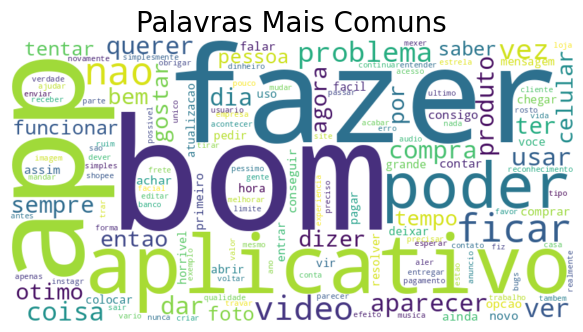

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

df = pd.read_csv('/content/drive/MyDrive/TCC/gpt_2_preprocess_lemmatizer.csv', sep=',')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['cleaned_content'] = df['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df['cleaned_content'].tolist())

word_counts = Counter(all_words.split())


top_common_words = dict(word_counts.most_common(150))
least_common_words = dict(word_counts.most_common()[-150:])


wordcloud_common = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_common_words)


wordcloud_rare = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(least_common_words)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.title('Palavras Mais Comuns', fontsize=20)
plt.axis('off')

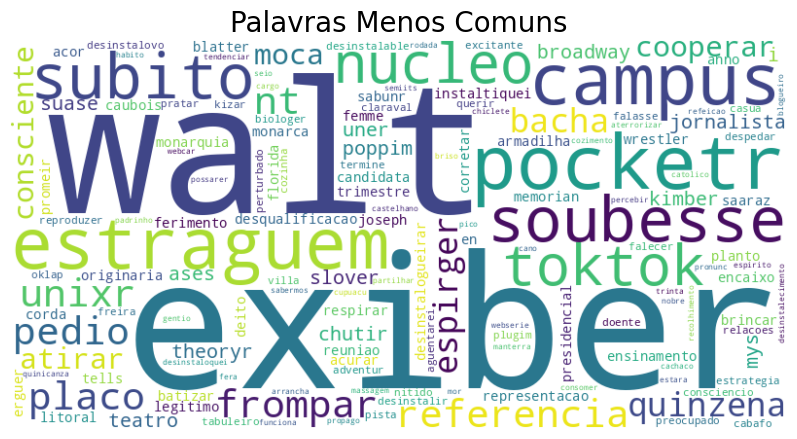

{'walt': 1, 'exiber': 1, 'pocketr': 1, 'estraguem': 1, 'campus': 1, 'soubesse': 1, 'subito': 1, 'toktok': 1, 'nucleo': 1, 'frompar': 1, 'referencia': 1, 'unixr': 1, 'nt': 1, 'placo': 1, 'pedio': 1, 'quinzena': 1, 'bacha': 1, 'espirger': 1, 'cooperar': 1, 'consciente': 1, 'moca': 1, 'atirar': 1, 'jornalista': 1, 'uner': 1, 'teatro': 1, 'poppim': 1, 'broadway': 1, 'theoryr': 1, 'kimber': 1, 'i': 1, 'suase': 1, 'ases': 1, 'mys': 1, 'slover': 1, 'chutir': 1, 'desqualificacao': 1, 'encaixo': 1, 'armadilha': 1, 'tells': 1, 'brincar': 1, 'memorian': 1, 'ensinamento': 1, 'representacao': 1, 'trimestre': 1, 'candidata': 1, 'instaltiquei': 1, 'presidencial': 1, 'florida': 1, 'reuniao': 1, 'desinstalogueirar': 1, 'batizar': 1, 'caubois': 1, 'sabunr': 1, 'planto': 1, 'saaraz': 1, 'originaria': 1, 'litoral': 1, 'acor': 1, 'acurar': 1, 'wrestler': 1, 'corretar': 1, 'ferimento': 1, 'respirar': 1, 'corda': 1, 'joseph': 1, 'legitimo': 1, 'blatter': 1, 'monarca': 1, 'monarquia': 1, 'promeir': 1, 'anno':

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_rare, interpolation='bilinear')
plt.title('Palavras Menos Comuns', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

print(least_common_words)

Batches:   0%|          | 0/131 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Coefficient (UMAP): 0.01
Proporção de outliers: 3.50%
Total de comentários fora de cluster: 146
Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): 10


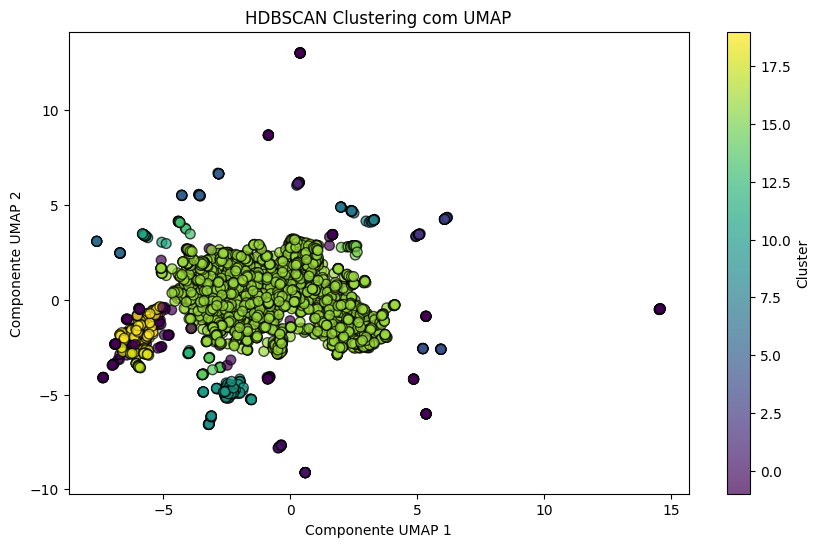

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
import hdbscan
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer

# === 1. Carrega e pré-processa ===
df = pd.read_csv('/content/drive/MyDrive/TCC/gpt_2_preprocess_lemmatizer.csv', sep=',')


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    return text.lower()

df['cleaned_content'] = df['spacy_lemma'].apply(clean_text)

all_words = ' '.join(df['cleaned_content'].tolist())
word_counts = Counter(all_words.split())

# Lista com as 150 palavras mais comuns
top_common_words = set([word for word, _ in word_counts.most_common(150)])

# === 2. Embeddings + Clustering ===
model = SentenceTransformer('LaBSE')
comentarios = df['spacy_lemma'].astype(str).tolist()
embeddings = model.encode(comentarios, show_progress_bar=True)

umap_model = umap.UMAP(
    n_neighbors=10,
    n_components=2,
    metric='cosine',
    random_state=42
)
umap_embeddings_comentarios = umap_model.fit_transform(embeddings)

clusterer = hdbscan.HDBSCAN(min_cluster_size=15,
                            min_samples=10,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)
cluster_fit = clusterer.fit(umap_embeddings_comentarios)

labels = clusterer.labels_
# Avalia coerência (somente se >1 cluster)
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(umap_embeddings_comentarios, labels)
    print("Silhouette Coefficient (UMAP): {:.2f}".format(silhouette_avg))
else:
    print("Silhouette não calculado (somente 1 cluster encontrado).")

df['cluster'] = labels
df['umap_x'] = umap_embeddings_comentarios[:, 0]
df['umap_y'] = umap_embeddings_comentarios[:, 1]

# === 3. Filtra os comentários "fora de cluster" com poucas palavras comuns ===
def count_common_words(text):
    return sum(1 for word in text.split() if word in top_common_words)

# Comentários fora de cluster
outliers_df = df[df['cluster'] == -1].copy()
outliers_df['common_word_count'] = outliers_df['cleaned_content'].apply(count_common_words)
outlier_ratio = np.mean(labels == -1)
print(f"Proporção de outliers: {outlier_ratio:.2%}")
# Exclui comentários que possuem menos de 2 palavras comuns (ajustável)
fora_de_contexto = outliers_df[outliers_df['common_word_count'] < 2]

print(f"Total de comentários fora de cluster: {len(outliers_df)}")
print(f"Comentários fora de cluster e com poucas palavras comuns (potencialmente irrelevantes): {len(fora_de_contexto)}")

# === 4. Visualização (opcional) ===
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['umap_x'],
    y=df['umap_y'],
    c=df['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7,
    edgecolors='k'
)
plt.colorbar(label='Cluster')
plt.title('HDBSCAN Clustering com UMAP')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.show()

# === 5. Exporta se desejar ===
fora_de_contexto.to_csv('comentarios_fora_de_contexto_filtrados.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Calcula centróides por cluster
centroids = {}
for cluster_id in df['cluster'].unique():
    if cluster_id == -1:
        continue
    cluster_points = df[df['cluster'] == cluster_id][['umap_x', 'umap_y']].values
    centroid = np.mean(cluster_points, axis=0)
    centroids[cluster_id] = centroid

# Calcula distância ao centróide
distances = []
for index, row in df.iterrows():
    cluster_id = row['cluster']
    point = row[['umap_x', 'umap_y']].values
    if cluster_id == -1:
        distances.append(np.nan)
    else:
        centroid = centroids[cluster_id]
        distance = np.linalg.norm(point - centroid)
        distances.append(distance)

df['distance_to_centroid'] = distances
df['original_index'] = df.index  # salva o índice original

# Comentários fora de contexto (fora de cluster)
outliers_df = df[df['distance_to_centroid'].isna()]
outliers_df.to_csv('/content/drive/MyDrive/TCC/comentarios_fora_de_contexto.csv', index=False)

# Apenas para visualização
print('\n\n')
num_outliers_validos = df['distance_to_centroid'].notna().sum()
print(f"Quantidade de comentários com distância válida ao centróide: {num_outliers_validos}")
outliers_count = df['distance_to_centroid'].isna().sum()
print(f"Quantidade de comentários fora do contexto: {outliers_count}")





Quantidade de comentários com distância válida ao centróide: 4021
Quantidade de comentários fora do contexto: 146


In [ ]:
import pandas as pd

outliers = pd.read_csv('/content/drive/MyDrive/TCC/comentarios_fora_de_contexto.csv', sep=',')

index_column = 'original_index' if 'original_index' in outliers.columns else outliers.index

sentiment_counts = outliers['sentiment'].value_counts()

above_3012 = outliers[outliers[index_column] > 3012]
below_or_equal_3012 = outliers[outliers[index_column] <= 3012]


count_above_3012 = above_3012.shape[0]
count_below_or_equal_3012 = below_or_equal_3012.shape[0]

comments_above_3012 = above_3012[['sentiment', 'comment']] if 'comment' in above_3012.columns else above_3012

comments_below_or_equal_3012 = below_or_equal_3012[['sentiment', 'comment']] if 'comment' in below_or_equal_3012.columns else below_or_equal_3012


print("Contagem por sentimento:\n", sentiment_counts)
print("\nQuantidade de comentários com índice > 3012:", count_above_3012)
print("Quantidade de comentários com índice <= 3012:", count_below_or_equal_3012)

print("\nComentários com índice > 3012:")
print(comments_above_3012)

print("\nComentários com índice <= 3012:")
print(comments_below_or_equal_3012)


Contagem por sentimento:
 sentiment
neutral      72
fear         35
happiness    15
anger        14
disgust       9
sadness       1
Name: count, dtype: int64

Quantidade de comentários com índice > 3012: 112
Quantidade de comentários com índice <= 3012: 34

Comentários com índice > 3012:
                                     content_traduzido  sentiment  \
34   boa entrega bons produtos app intuitivo bastan...  happiness   
35   boa entrega bons produtos app intuitivo bastan...  happiness   
36   boa entrega bons produtos app intuitivo bastan...  happiness   
37   boa entrega bons produtos app intuitivo bastan...  happiness   
38   boa entrega bons produtos app intuitivo bastan...  happiness   
..                                                 ...        ...   
141  acabando testar nao agradar desinstaloquei vol...    neutral   
142  baixei tiktok normal nao abrir celular vou bai...    neutral   
143  baixei tiktok normal nao abrir celular vou bai...    neutral   
144  baixei tiktok no

In [ ]:
from collections import Counter

for cluster_id in sorted(df['cluster'].unique()):
    if cluster_id == -1:
        continue  # ignora outliers
    print(f"\n=== Cluster {cluster_id} ===")

    # 1️⃣ 10 comentários de exemplo
    exemplos = df[df['cluster'] == cluster_id]['spacy_lemma'].head(10).tolist()
    for ex in exemplos:
        print("-", ex)

    # 2️⃣ Palavras mais comuns
    palavras = ' '.join(df[df['cluster'] == cluster_id]['cleaned_content']).split()
    mais_comuns = Counter(palavras).most_common(10)
    print("\nPalavras mais frequentes:", mais_comuns)



=== Cluster 0 ===
- ['entender', 'ainda', 'gostar', 'ainda', 'gostar']
- ['limpar', 'arquivo', 'desnecessario']
- ['limpar', 'arquivo', 'desnecessario', 'servidor']
- ['limpar', 'arquivo', 'desnecessario', 'quantidade', 'texto', 'poder', 'aumentar', 'mesmo', 'usar', 'ambiente', 'modelo', 'classico', 'teoriar', 'espaco', 'precisamente', 'modelo', 'espaco', 'teoriar', 'espaco', 'dimensoe', 'basicar', 'modelo', 'espaco', 'possuir', 'diferente', 'chamar', 'dimensoe', 'maioria', 'modelo', 'diferente', 'teoria', 'tipo', 'requisito']
- ['limpar', 'arquivo', 'desnecessario', 'cliente', 'dever', 'depender', 'proprio', 'necessidade']
- ['limpar', 'arquivo', 'desnecessario', 'tabela', 'caracter', 'tamanhar', 'alfabeto']
- ['limpar', 'arquivo', 'desnecessario', 'exemplo', 'painel', 'store']
- ['limpar', 'arquivo', 'desnecessario', 'capacidade', 'usuario', 'pesquisar', 'conteudo', 'arquivo', 'computador']
- ['limpar', 'arquivo', 'desnecessario', 'arquivo', 'codice', 'disponivel', 'maioria', 'distr

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/TCC/apps_reviews_lemmatizer.csv', sep=',')
df_aumentado = pd.read_csv('/content/drive/MyDrive/TCC/gpt_2_preprocess_lemmatizer.csv', sep=',')
df_aumentado['cleaned_content'] = df_aumentado['spacy_lemma'].apply(clean_text)
df_aumentado['cluster'] = clusterer.labels_  # resultado do HDBSCAN



In [ ]:
# Comentários originais dentro do dataset aumentado
comentarios_originais = df_aumentado[df_aumentado['spacy_lemma'].isin(df_original['spacy_lemma'])]
outliers_originais = comentarios_originais[comentarios_originais['cluster'] == -1]
print(f"Total de comentários originais que viraram outliers: {len(outliers_originais)}")



Total de comentários originais que viraram outliers: 18


In [ ]:
for c in outliers_originais['spacy_lemma'].tolist():
    print("-", c)


- ['problema', 'resolver', 'nota']
- ['bom', 'entrega', 'bom', 'produto', 'appr', 'intuitivo', 'bastante', 'completo', 'promocoes', 'frete', 'ajudar', 'norte']
- ['dia', 'passar', 'App', 'ficar', 'mau', 'pesar', 'abrir', 'abrir', 'trar', 'homem', 'decepcionar', 'pele', 'claro']
- ['esperar', 'resolvar', 'problema', 'celular', 'ficarar', 'satisfeita', 'aplicativo']
- ['Ridiculo', 'atrapalhar', 'celular']
- ['chegar', 'anuncio', 'ficar', 'cansativo', 'denunciem', 'app', 'hacker', 'ler', 'horrivel']
- ['gostar', 'antes', 'instalar', 'incomodar']
- ['aplicativo', 'cuidado', 'instalar', 'adware', 'ficar', 'aparecer', 'vario', 'propagando', 'apps', 'instalar', 'play', 'store']
- ['acabar', 'testar', 'agradar', 'desinstalo']
- ['nao', 'bom', 'acabar', 'instalar']
- ['vir', 'manda', 'anuncio', 'aplicativo']
- ['esperar', 'resolvar', 'vez', 'problema']
- ['nao', 'gosto', 'instalei', 'ficar', 'incomodar']
- ['adiantar', 'instalar']
- ['nao', 'servir', 'aqui', 'motorola']
- ['aparecer', 'anuncio'

In [ ]:
# Marcar quais eram outliers no dataset original
df_original_outliers = comentarios_originais[comentarios_originais['cluster'] == -1]['spacy_lemma'].tolist()
outliers_originais['era_outlier_original'] = outliers_originais['spacy_lemma'].apply(
    lambda x: x in df_original_outliers
)

# Quantos eram outliers antes vs agora
print(outliers_originais['era_outlier_original'].value_counts())


era_outlier_original
True    18
Name: count, dtype: int64


/tmp/ipython-input-2759463196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_originais['era_outlier_original'] = outliers_originais['spacy_lemma'].apply(


# Análise dos resultados


In [ ]:
# Instala a biblioteca para ler arquivos Excel (se necessário)
!pip install openpyxl

# Importação das bibliotecas necessárias
import pandas as pd
from google.colab import files
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [ ]:
df_aumentado = pd.read_csv("/content/drive/MyDrive/TCC/gpt-2_preprocess_dataset_augmentation.csv")
df_llama32_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/llama32_comentariosInteiros_seniment_aumentado.csv")
df_mistral_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/mistral_comentariosInteiros_seniment_aumentado.csv")
df_phi4_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/phi4_comentariosInteiros_seniment_aumentado.csv")
df_bertimbau_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/resultados_completos_bertimbau/bertimbau_full_sentiment_predict.csv")

sentiment_true = 'sentiment'
sentiment_predicted = 'sentiment_predicted'
erro = 'erro'

llm_dataframes = [
    (df_llama32_sentiment, "Llama 3.2 (3B)"),
    (df_mistral_sentiment, "Mistral 7B"),
    (df_phi4_sentiment, "Phi-4 (2.7B)"),
    (df_bertimbau_sentiment, "BERTimbau")
]


In [ ]:

def processar_dataset_sentiment(df_llm, nome_llm, df_true):
    """
    Combina os rótulos de Sentimento, conta erros e calcula métricas,
    com tratamento final e forçado de valores nulos (NaN/float).
    """
    print(f"\n\n{'='*60}\nANÁLISE DO MODELO: {nome_llm} (Apenas Sentimento)\n{'='*60}")

    try:
        true_labels_raw = df_true[sentiment_true].fillna('MISSING_TRUE')
        true_labels_cleaned = true_labels_raw.apply(lambda x: x if isinstance(x, str) else 'MISSING_TRUE')
        df_llm['y_true_sent'] = true_labels_cleaned.str.upper().str.strip()
        df_llm['y_pred_sent'] = df_llm[sentiment_predicted].fillna('MISSING_PRED').astype(str).str.upper().str.strip()

    except KeyError as e:
        print(f"❌ ERRO: Coluna não encontrada. Verifique se as variáveis de coluna ({e}) estão corretas.")
        return

    # --- Análise de Sentimento ---
    col_true = 'y_true_sent'
    col_pred = 'y_pred_sent'
    nome_tarefa = "SENTIMENTO"

    # Filtra linhas onde o True Label é 'MISSING_TRUE' (NaN original, que não deve ser avaliado)
    df_filtrado = df_llm[df_llm[col_true] != 'MISSING_TRUE'].copy()

   # --- Normalização e contagem de erros ---
    df_filtrado[col_pred] = (
        df_filtrado[col_pred]
        .astype(str)
        .str.strip()
        .str.upper()
        .str.replace(r"[\n\r\t]", "", regex=True)
    )

    erro_PAD = erro.upper().strip()

    erros_llm_previstos = (df_filtrado[col_pred] == erro_PAD).sum()
    total_valid = len(df_filtrado)
    classes_validas = [c for c in df_filtrado[col_true].unique() if c != erro_PAD]

    print(f"\n--- {nome_tarefa} ({len(classes_validas)} Classes) ---")

    total_valid = len(df_filtrado)
    print(f"Total de amostras válidas (com True Label): {total_valid}")
    print(f"Previsões rotuladas como '{erro}': {erros_llm_previstos} ({erros_llm_previstos/total_valid*100:.2f}%)")

    df_limpo = df_filtrado[
        (df_filtrado[col_pred] != erro) &
        (df_filtrado[col_pred] != 'MISSING_PRED')
    ].copy()

    if df_limpo.empty:
        print("Não há dados válidos (sem erro de previsão) para calcular as métricas.")
        return
    df_limpo[col_true] = df_limpo[col_true].astype(str).str.upper().str.strip()
    df_limpo[col_pred] = df_limpo[col_pred].astype(str).str.upper().str.strip()

    classes_validas = sorted(df_limpo[col_true].unique())

    y_true = df_limpo[col_true]
    y_pred = df_limpo[col_pred]

    # 3. Cálculo e Exibição do Classification Report
    print("\nMétricas de Classificação (Weighted Avg):")
    # Passamos apenas as classes válidas (do y_true) para o labels
    print(classification_report(y_true, y_pred, zero_division=0, labels=classes_validas))

    # Acurácia simples (global)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Acurácia Global (sem erros de previsão): {accuracy:.4f}")
    return accuracy

resultados = []

for df_llm, nome_llm in llm_dataframes:
    acc = processar_dataset_sentiment(df_llm, nome_llm, df_aumentado)
    resultados.append({"modelo": nome_llm, "acuracia": acc})
pd.DataFrame(resultados)



ANÁLISE DO MODELO: Llama 3.2 (3B) (Apenas Sentimento)

--- SENTIMENTO (7 Classes) ---
Total de amostras válidas (com True Label): 4167
Previsões rotuladas como 'erro': 184 (4.42%)

Métricas de Classificação (Weighted Avg):
              precision    recall  f1-score   support

       ANGER       0.37      0.07      0.12       818
     DISGUST       0.29      0.18      0.22       952
        FEAR       0.11      0.02      0.04       226
   HAPPINESS       0.66      0.23      0.34       525
     NEUTRAL       0.18      0.45      0.26       568
     SADNESS       0.08      0.02      0.03       892
    SURPRISE       0.04      0.32      0.07       186

   micro avg       0.17      0.16      0.17      4167
   macro avg       0.25      0.18      0.15      4167
weighted avg       0.27      0.16      0.16      4167

Acurácia Global (sem erros de previsão): 0.1649


ANÁLISE DO MODELO: Mistral 7B (Apenas Sentimento)

--- SENTIMENTO (7 Classes) ---
Total de amostras válidas (com True Label): 41

,modelo,acuracia
0,Llama 3.2 (3B),0.164867
1,Mistral 7B,0.335973
2,Phi-4 (2.7B),0.321334
3,BERTimbau,0.850012


In [ ]:
def vetor_acertos(df_modelo, df_true):
    """
    Retorna vetor binário (1=acerto, 0=erro), detectando automaticamente as colunas corretas.
    """
    # Detecta automaticamente as colunas de predição e verdade
    col_pred = next((c for c in df_modelo.columns if "predict" in c.lower() or "pred" in c.lower()), None)
    col_true = next((c for c in df_true.columns if "sentiment" in c.lower()), None)

    if not col_pred or not col_true:
        raise KeyError(f"❌ Colunas não encontradas: predição=({col_pred}), verdade=({col_true})")

    # Faz merge pelo texto se possível
    if "content" in df_modelo.columns and "content" in df_true.columns:
        merged = df_modelo.merge(df_true[["content", col_true]], on="content", how="inner")
        y_true = merged[col_true]
        y_pred = merged[col_pred]
    else:
        n = min(len(df_modelo), len(df_true))
        y_true = df_true[col_true].iloc[:n].reset_index(drop=True)
        y_pred = df_modelo[col_pred].iloc[:n].reset_index(drop=True)

    # Normaliza
    y_true = y_true.astype(str).str.upper().str.strip()
    y_pred = y_pred.astype(str).str.upper().str.strip()

    # Vetor binário
    return (y_true == y_pred).astype(int)


In [ ]:
from itertools import combinations
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

# --- Vetores de acertos por modelo ---
acertos_modelos = {
    "Llama 3.2 (3B)": vetor_acertos(df_llama32_sentiment, df_aumentado),
    "Mistral 7B": vetor_acertos(df_mistral_sentiment, df_aumentado),
    "Phi-4 (2.7B)": vetor_acertos(df_phi4_sentiment, df_aumentado),
    "BERTimbau": vetor_acertos(df_bertimbau_sentiment, df_aumentado)
}

# --- Comparações pareadas ---
resultados_tests = []
for (nome_a, acertos_a), (nome_b, acertos_b) in combinations(acertos_modelos.items(), 2):
    t_stat, p_val_t = ttest_rel(acertos_a, acertos_b)
    w_stat, p_val_w = wilcoxon(acertos_a, acertos_b)
    resultados_tests.append({
        "Modelo A": nome_a,
        "Modelo B": nome_b,
        "T pareado": t_stat,
        "p-valor T": p_val_t,
        "Wilcoxon W": w_stat,
        "p-valor Wilcoxon": p_val_w
    })

# --- Tabela final ---
df_comparacoes = pd.DataFrame(resultados_tests)
df_comparacoes.to_csv('/content/drive/MyDrive/TCC/comparacoes_modelos_stat_tests.csv', index=False)
display(df_comparacoes)


,Modelo A,Modelo B,T pareado,p-valor T,Wilcoxon W,p-valor Wilcoxon
0,Llama 3.2 (3B),Mistral 7B,-19.324495,9.409081e-80,285670.0,1.568870e-76
1,Llama 3.2 (3B),Phi-4 (2.7B),-19.026747,1.812173e-77,199212.0,1.976686e-74
2,Llama 3.2 (3B),BERTimbau,-87.395688,0.000000e+00,127008.0,0.000000e+00
3,Mistral 7B,Phi-4 (2.7B),1.569545,1.165969e-01,548100.0,1.165851e-01
4,Mistral 7B,BERTimbau,-57.058827,0.000000e+00,231012.0,0.000000e+00
5,Phi-4 (2.7B),BERTimbau,-56.418804,0.000000e+00,326835.0,0.000000e+00


In [ ]:
df_aumentado = pd.read_csv("/content/drive/MyDrive/TCC/gpt-2_preprocess_dataset_augmentation.csv")
df_llama32_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/llama32_comentariosInteiros_polarity_aumentado.csv")
df_mistral_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/mistral_comentariosInteiros_polarity_aumentado.csv")
df_phi4_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/phi4_comentariosInteiros_polarity_aumentado.csv")
df_bertimbau_sentiment = pd.read_csv("/content/drive/MyDrive/TCC/resultados_completos_bertimbau/bertimbau_full_polarity_predict.csv")

sentiment_polarity_true = 'sentiment_polarity'
sentiment_polarity_predicted = 'sentiment_predicted'
erro = 'erro'

llm_dataframes = [
    (df_llama32_sentiment, "Llama 3.2 (3B)"),
    (df_mistral_sentiment, "Mistral 7B"),
    (df_phi4_sentiment, "Phi-4 (2.7B)"),
    (df_bertimbau_sentiment, "BERTimbau")
]


In [ ]:
df_bertimbau_sentiment

,content,spacy_lemma,sentiment_polarity,sentiment_predicted
0,app shopee razoavel apesar facil utilizar apre...,"['app', 'shopee', 'razoavel', 'apesar', 'facil...",2,2
1,app bem otimizado facil visualizar produtos pe...,"['appr', 'bem', 'otimizar', 'facil', 'visualiz...",2,2
2,app bom pratico facil entender porem alguns ve...,"['app', 'bom', 'pratico', 'facil', 'entender',...",2,2
3,aplicativo bom algo chateou bastante fato pesq...,"['aplicativo', 'bom', 'chatear', 'bastante', '...",2,2
4,app bom porem tido dificuldades pagamento cart...,"['app', 'bom', 'por', 'ter', 'dificuldade', 'p...",0,0
...,...,...,...,...
4162,favor nao enviar dinheiro dinheiro fiz entao,"['favor', 'enviar', 'dinheiro', 'fiz', 'entao']",1,1
4163,favor nao enviar vezes a resposta resposta mid...,"['favor', 'enviar', 'vez', 'resposta', 'respos...",1,1
4164,negocio ai limpe celular ta cheio virus its ai...,"['negocio', 'limpe', 'celular', 'cheio', 'ar',...",1,1
4165,negocio ai limpe celular ta cheio virus linger...,"['negocio', 'limpe', 'celular', 'cheio', 'viru...",1,1


In [ ]:
# Mapeamento dos valores para as respectivas classes
mapa_sentimentos = {
    0: "NEGATIVE",
    1: "NEUTRAL",
    2: "POSITIVE"
}

# Aplica o mapeamento nas duas colunas
df_bertimbau_sentiment['sentiment_polarity'] = df_bertimbau_sentiment['sentiment_polarity'].map(mapa_sentimentos)
df_bertimbau_sentiment['sentiment_predicted'] = df_bertimbau_sentiment['sentiment_predicted'].map(mapa_sentimentos)


In [ ]:
def processar_dataset_sentiment(df_llm, nome_llm, df_true):
    """
    Combina os rótulos de Sentimento, conta erros e calcula métricas.
    Retorna a Acurácia e o Relatório de Classificação em formato de texto.
    """
    print(f"\n\n{'='*60}\nANÁLISE DO MODELO: {nome_llm} (Apenas Sentimento)\n{'='*60}")
    report_text = None # Variável para armazenar o relatório

    try:
        true_labels_raw = df_true[sentiment_true].fillna('MISSING_TRUE')
        true_labels_cleaned = true_labels_raw.apply(lambda x: x if isinstance(x, str) else 'MISSING_TRUE')
        df_llm['y_true_sent'] = true_labels_cleaned.str.upper().str.strip()
        df_llm['y_pred_sent'] = df_llm[sentiment_predicted].fillna('MISSING_PRED').astype(str).str.upper().str.strip()

    except KeyError as e:
        print(f"❌ ERRO: Coluna não encontrada. Verifique se as variáveis de coluna ({e}) estão corretas.")
        return None, None

    # --- Análise de Sentimento ---
    col_true = 'y_true_sent'
    col_pred = 'y_pred_sent'
    nome_tarefa = "SENTIMENTO"

    df_filtrado = df_llm[df_llm[col_true] != 'MISSING_TRUE'].copy()

    # --- Normalização e contagem de erros ---
    df_filtrado[col_pred] = (
        df_filtrado[col_pred]
        .astype(str)
        .str.strip()
        .str.upper()
        .str.replace(r"[\n\r\t]", "", regex=True)
    )

    erro_PAD = erro.upper().strip()

    erros_llm_previstos = (df_filtrado[col_pred] == erro_PAD).sum()
    total_valid = len(df_filtrado)
    classes_validas = [c for c in df_filtrado[col_true].unique() if c != erro_PAD]

    print(f"\n--- {nome_tarefa} ({len(classes_validas)} Classes) ---")

    total_valid = len(df_filtrado)
    print(f"Total de amostras válidas (com True Label): {total_valid}")
    print(f"Previsões rotuladas como '{erro}': {erros_llm_previstos} ({erros_llm_previstos/total_valid*100:.2f}%)")

    df_limpo = df_filtrado[
        (df_filtrado[col_pred] != erro_PAD) & # CORRIGIDO: Usar erro_PAD (uppercase)
        (df_filtrado[col_pred] != 'MISSING_PRED')
    ].copy()

    if df_limpo.empty:
        print("Não há dados válidos (sem erro de previsão) para calcular as métricas.")
        return None, None

    df_limpo[col_true] = df_limpo[col_true].astype(str).str.upper().str.strip()
    df_limpo[col_pred] = df_limpo[col_pred].astype(str).str.upper().str.strip()

    classes_validas = sorted(df_limpo[col_true].unique())

    y_true = df_limpo[col_true]
    y_pred = df_limpo[col_pred]

    # 3. Cálculo e Exibição do Classification Report (retornando o relatório como texto)
    report_text = classification_report(y_true, y_pred, zero_division=0, labels=classes_validas, output_dict=False)
    print("\nMétricas de Classificação (Relatório Detalhado):")
    print(report_text)

    # Acurácia simples (global)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Acurácia Global (sem erros de previsão): {accuracy:.4f}")

    return accuracy, report_text

resultados = []
relatorios_sentiment = {} # Dicionário para armazenar os relatórios detalhados

for df_llm, nome_llm in llm_dataframes:
    acc, report = processar_dataset_sentiment(df_llm, nome_llm, df_aumentado)

    # Armazena a acurácia (se cálculo foi bem sucedido)
    if acc is not None:
        resultados.append({"modelo": nome_llm, "acuracia": acc})

    # Armazena o relatório para análise detalhada (se existir)
    if report is not None:
        relatorios_sentiment[nome_llm] = report

print("\n\n" + "="*60)
print("RELATÓRIOS DETALHADOS (para análise das classes, ex: FEAR):")
print("="*60)

for nome, relatorio in relatorios_sentiment.items():
    print(f"\n--- {nome} ---")
    print(relatorio)

pd.DataFrame(resultados)



ANÁLISE DO MODELO: Llama 3.2 (3B) (Apenas polaridade)

--- polaridade (3 Classes) ---
Total de amostras válidas (com True Label): 4167
Previsões rotuladas como 'erro': 1 (0.02%)

Métricas de Classificação (Weighted Avg):
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.77      0.76      1996
     NEUTRAL       0.19      0.67      0.29       568
    POSITIVE       0.99      0.05      0.10      1603

   micro avg       0.48      0.48      0.48      4167
   macro avg       0.64      0.50      0.39      4167
weighted avg       0.76      0.48      0.44      4167

Acurácia Global (sem erros de previsão): 0.4824


ANÁLISE DO MODELO: Mistral 7B (Apenas polaridade)

--- polaridade (3 Classes) ---
Total de amostras válidas (com True Label): 4167
Previsões rotuladas como 'erro': 2 (0.05%)

Métricas de Classificação (Weighted Avg):
              precision    recall  f1-score   support

    NEGATIVE       0.76      0.89      0.82      1996
     NEUTRAL       0

,modelo,acuracia
0,Llama 3.2 (3B),0.482361
1,Mistral 7B,0.738661
2,Phi-4 (2.7B),0.759539
3,BERTimbau,0.950804


In [ ]:
def vetor_acertos(df_modelo, df_true):
    """
    Retorna vetor binário (1=acerto, 0=erro), detectando automaticamente as colunas corretas.
    """
    # Detecta automaticamente as colunas de predição e verdade
    col_pred = next((c for c in df_modelo.columns if "predict" in c.lower() or "pred" in c.lower()), None)
    col_true = next((c for c in df_true.columns if "sentiment_polarity" in c.lower()), None)

    if not col_pred or not col_true:
        raise KeyError(f"❌ Colunas não encontradas: predição=({col_pred}), verdade=({col_true})")

    # Faz merge pelo texto se possível
    if "content" in df_modelo.columns and "content" in df_true.columns:
        merged = df_modelo.merge(df_true[["content", col_true]], on="content", how="inner")
        y_true = merged[col_true]
        y_pred = merged[col_pred]
    else:
        n = min(len(df_modelo), len(df_true))
        y_true = df_true[col_true].iloc[:n].reset_index(drop=True)
        y_pred = df_modelo[col_pred].iloc[:n].reset_index(drop=True)

    # Normaliza
    y_true = y_true.astype(str).str.upper().str.strip()
    y_pred = y_pred.astype(str).str.upper().str.strip()

    # Vetor binário
    return (y_true == y_pred).astype(int)


In [ ]:
from itertools import combinations
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

# --- Vetores de acertos por modelo ---
acertos_modelos = {
    "Llama 3.2 (3B)": vetor_acertos(df_llama32_sentiment, df_aumentado),
    "Mistral 7B": vetor_acertos(df_mistral_sentiment, df_aumentado),
    "Phi-4 (2.7B)": vetor_acertos(df_phi4_sentiment, df_aumentado),
    "BERTimbau": vetor_acertos(df_bertimbau_sentiment, df_aumentado)
}

# --- Comparações pareadas ---
resultados_tests = []
for (nome_a, acertos_a), (nome_b, acertos_b) in combinations(acertos_modelos.items(), 2):
    t_stat, p_val_t = ttest_rel(acertos_a, acertos_b)
    w_stat, p_val_w = wilcoxon(acertos_a, acertos_b)
    resultados_tests.append({
        "Modelo A": nome_a,
        "Modelo B": nome_b,
        "T pareado": t_stat,
        "p-valor T": p_val_t,
        "Wilcoxon W": w_stat,
        "p-valor Wilcoxon": p_val_w
    })

# --- Tabela final ---
df_comparacoes = pd.DataFrame(resultados_tests)
df_comparacoes.to_csv('/content/drive/MyDrive/TCC/comparacoes_modelos_stat_tests.csv', index=False)
display(df_comparacoes)


,Modelo A,Modelo B,T pareado,p-valor T,Wilcoxon W,p-valor Wilcoxon
0,Llama 3.2 (3B),Mistral 7B,-27.104113,3.832685e-149,346216.5,7.258465e-138
1,Llama 3.2 (3B),Phi-4 (2.7B),-33.133462,6.857128e-214,145920.0,5.192787e-191
2,Llama 3.2 (3B),BERTimbau,-56.258296,0.000000e+00,87938.5,0.000000e+00
3,Mistral 7B,Phi-4 (2.7B),-3.388160,7.101596e-04,94997.0,7.146199e-04
4,Mistral 7B,BERTimbau,-28.761205,4.290518e-166,70246.0,3.784960e-152
5,Phi-4 (2.7B),BERTimbau,-26.764038,9.465494e-146,62920.0,5.645458e-135


# Abaixo estão os códigos utilizados no servidor remoto com a API Ollama

In [ ]:
#bibliotecas
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()


import requests
import pandas as pd
import math
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from concurrent.futures import ThreadPoolExecutor, as_completed

data_content3 = pd.read_csv('/var/www/ia/dataset_notpreprocess_limpo.csv')

def run_model(model_name, input_data):
    prompt = (
        'Preciso que você fale em português brasileiro e é expert em análise de sentimentos '
        'quero que você classifique o seguinte comentário como positive, negative ou neutral '
        '\nResponda apenas com uma única palavra: "positive", "negative" ou "neutral", NÃO RESPONDA NADA ALÉM DISSO e não justifique sua resposta '
        f'\nO comentário a ser classificado é: "{input_data}"'
    )

    if isinstance(input_data, str):
        input_data = input_data.strip()
        try:
            if math.isnan(float(input_data)) or math.isinf(float(input_data)):
                raise ValueError()
        except:
            pass
    else:
        input_data = "Invalid input"

    url = 'http://localhost:11434/api/chat'
    payload = {
        "model": model_name,
        "messages": [{"role": "user", "content": prompt}],
        "stream": False
    }

    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            res_json = response.json()
            content = res_json.get("message", {}).get("content", "").lower().strip()
            print(prompt)
            print(f" -------------------------- Resposta do modelo: {content} ---------------------")
            return res_json
        else:
            return "erro"
    except requests.exceptions.RequestException:
        return "erro"


def evaluate_model_streaming(dataset, model_name, output_path, max_workers=1):
    y_true = dataset['sentiment_polarity'].tolist()
    comments = dataset['content'].fillna("").tolist()
    y_pred = []

    label_map = {
    "positive": "positive",
    "positivo": "positive",
    "negative": "negative",
    "negativo": "negative",
    "neutral": "neutral",
    "neutro": "neutral",
    "positive.": "positive",
    "positivo.": "positive",
    "negative.": "negative",
    "negativo.": "negative",
    "neutral.": "neutral",
    "neutro.": "neutral",
    "positiva": "positive",
    "negativa": "negative",
    "neutra": "neutral"
    }


    with open(output_path, 'w', encoding='utf-8') as f:
        f.write("content,sentiment_polarity,sentiment_predicted\n")

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(run_model, model_name, comment): i for i, comment in enumerate(comments)}

        for future in as_completed(futures):
            idx = futures[future]
            comment = comments[idx]
            true_label = y_true[idx]

            result = future.result()
            print("Resultado: " , result)
            if isinstance(result, dict):
                pred_raw = result.get("message", {}).get("content", "").strip().lower()
                pred = label_map.get(pred_raw, "erro")
                if pred == "erro":
                    print(f"\033[91mPred: {pred}\033[0m , {pred_raw}\033[0m")  # Vermelho
                else:
                    print(f"-----------  Pred: {pred}, resultado: {pred_raw} -----------------")
            else:
                pred = "erro"

            y_pred.append((idx, pred))  # salva com o índice

            with open(output_path, 'a', encoding='utf-8') as f:
                f.write(f'"{comment}","{true_label}","{pred}"\n')

    # Ordena para alinhar com y_true
    y_pred = [pred for _, pred in sorted(y_pred, key=lambda x: x[0])]

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
    accuracy = accuracy_score(y_true, y_pred)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


model_name = 'llama3.2'
#model_name = 'mistral'
#model_name = 'phi4'
path = "/var/www/ia/resultado_incremental.csv"
metrics = evaluate_model_streaming(data_content3, model_name,path)
print("Métricas de Avaliação:\n", metrics)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


# Salvando métricas e uso de recursos
results_df = pd.DataFrame([{
    'Modelo': model_name,
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score'],
    'Accuracy': metrics['Accuracy'],
    'Tempo (s)': round(elapsed_time, 2),
    'CPU (%)': cpu_percent,
    'Memória (MB)': round(memory_info.rss / 1024 ** 2, 2)
}])

results_df.to_csv('/var/www/ia/metricas_avaliacao.csv', index=False)

# Salvando dataset com classificações
data_content3.to_csv('/var/www/ia/lemmatizer_com_resultados.csv', index=False)

In [ ]:
#bibliotecas
import time
import psutil
import os

process = psutil.Process(os.getpid())
start_time = time.time()


import requests
import pandas as pd
import math
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from concurrent.futures import ThreadPoolExecutor, as_completed

data_content3 = pd.read_csv('/var/www/ia/dataset_notpreprocess_limpo.csv')

def run_model(model_name, input_data):
    prompt = (
        'Preciso que você fale em português brasileiro e é expert em análise de sentimentos '
        'quero que você classifique o seguinte comentário com a emoção que você acha que é, sendo elas sadness, happiness, disgust, anger, fear, surprise ou neutral '
        'Responda apenas com uma única palavra: sadness, happiness, disgust, anger, fear, surprise  ou neutral, NÃO RESPONDA NADA ALÉM dessas emoções e sem aspas e não justifique sua resposta '
        f'O comentário a ser classificado é: "{input_data}"'
    )

    if isinstance(input_data, str):
        input_data = input_data.strip()
        try:
            if math.isnan(float(input_data)) or math.isinf(float(input_data)):
                raise ValueError()
        except:
            pass
    else:
        input_data = "Invalid input"

    url = 'http://localhost:11434/api/chat'
    payload = {
        "model": model_name,
        "messages": [{"role": "user", "content": prompt}],
        "stream": False
    }

    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            res_json = response.json()
            content = res_json.get("message", {}).get("content", "").lower().strip()
            print(prompt)
            return res_json
        else:
            return "erro"
    except requests.exceptions.RequestException:
        return "erro"


def evaluate_model_streaming(dataset, model_name, output_path, max_workers=1):
    y_true = dataset['sentiment'].tolist()
    comments = dataset['content'].fillna("").tolist()
    y_pred = []

    label_map = {
    "sadness": "sadness",
    "tristeza": "sadness",
    "triste" :"sadness",
    "deprimido" :"sadness",
    "disgust": "disgust",
    "desgosto": "disgust",
    "insatisfação": "disgust",
    "insatisfeito": "disgust",
    "happiness": "happiness",
    "felicidade": "happiness",
    "feliz": "happiness",
    "anger": "anger",
    "raiva": "anger",
    "frusttion":"anger",
    "frustação":"anger",
    "irritante": "anger",
    "irritado": "anger",
    "fear" :"fear",
    "medo": "fear",
    "surprise": "surprise",
    "surpresa": "surprise",
    "surpreso": "surprise",
    "neutral": "neutral",
    "neutro": "neutral",
    }


    with open(output_path, 'w', encoding='utf-8') as f:
        f.write("content,sentiment,sentiment_predicted\n")

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(run_model, model_name, comment): i for i, comment in enumerate(comments)}

        for future in as_completed(futures):
            idx = futures[future]
            comment = comments[idx]
            true_label = y_true[idx]

            result = future.result()
            if isinstance(result, dict):
                pred_raw = result.get("message", {}).get("content", "").strip().lower()
                pred = label_map.get(pred_raw, "erro")
                if pred == "erro":
                    print(f"\033[91mPred: {pred}\033[0m , {pred_raw}\033[0m")  # Vermelho
                else:
                    print(f"-----------  Pred: {pred}, resultado: {pred_raw} -----------------")
            else:
                pred = "erro"

            y_pred.append((idx, pred))  # salva com o índice

            with open(output_path, 'a', encoding='utf-8') as f:
                f.write(f'"{comment}","{true_label}","{pred}"\n')

    # Ordena para alinhar com y_true
    y_pred = [pred for _, pred in sorted(y_pred, key=lambda x: x[0])]

    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
    accuracy = accuracy_score(y_true, y_pred)

    return {
        'Precision': f"{precision:.3f}",
        'Recall': f"{recall:.3f}",
        'F1-Score': f"{f1:.3f}",
        'Accuracy': f"{accuracy:.3f}",
    }


model_name = 'llama3.2'
#model_name = 'mistral'
#model_name = 'phi4'
path = "/var/www/ia/resultado_incremental_sentiment.csv"
metrics = evaluate_model_streaming(data_content3, model_name,path)
print("Métricas de Avaliação:\n", metrics)

end_time = time.time()
elapsed_time = end_time - start_time
cpu_percent = process.cpu_percent(interval=None)
memory_info = process.memory_info()
print("\n\n")
print(f"Tempo total: {elapsed_time:.2f} segundos")
print(f"Uso de CPU: {cpu_percent}%")
print(f"Memória usada: {memory_info.rss / 1024 ** 2:.2f} MB")


# Salvando métricas e uso de recursos
results_df = pd.DataFrame([{
    'Modelo': model_name,
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1-Score': metrics['F1-Score'],
    'Accuracy': metrics['Accuracy'],
    'Tempo (s)': round(elapsed_time, 2),
    'CPU (%)': cpu_percent,
    'Memória (MB)': round(memory_info.rss / 1024 ** 2, 2)
}])

results_df.to_csv('/var/www/ia/metricas_avaliacao_sentiment.csv', index=False)

# Salvando dataset com classificações
data_content3.to_csv('/var/www/ia/lemmatizer_com_resultados_sentiment.csv', index=False)